<a href="https://colab.research.google.com/github/VishnuBhaarath/Rainfallpred/blob/master/LSTM50_50mae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
from sklearn.metrics import r2_score

In [0]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from numpy import hstack
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing

In [0]:
df=pd.read_excel('trend_anna_imd_21.xlsx')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1
0,1. Cuddalore,NaN
1,1965-01-01 00:00:00,10.6
2,1965-01-02 00:00:00,0.0
3,1965-01-03 00:00:00,13.0
4,1965-01-04 00:00:00,0.0


In [0]:
Cuddalore=df[3655:19360]
Panruti=df[23016:38721]
Dharmapuri=df[42408:58082]
Harur=df[61738:77443]
Palacode=df[81158:96804]
Pennagaram=df[100460:116165]
Chengam=df[119821:135526]
Sathanur=df[138817:154522]
Tiruvanamalai=df[158178:173883]
Sankarapuram=df[177539:193244]
Tirukoilur=df[196899:212604]
ulundurpet=df[216260:231965]
Villupuram=df[235621:251326]
Denkanikottai=df[274343:290048]
Hosur=df[293703:309408]
Krishnagiri=df[313063:328768]
Marandahalli=df[332059:347764]
Rayakottai=df[353250:368955]
Uthangarai=df[372611:388316]


In [0]:
Cuddalore.columns = ['Date', 'Rainfall']
Panruti.columns= ['Date', 'Rainfall']
Dharmapuri.columns= ['Date', 'Rainfall']
Harur.columns= ['Date', 'Rainfall']
Palacode.columns= ['Date', 'Rainfall']
Pennagaram.columns= ['Date', 'Rainfall']
Chengam.columns= ['Date', 'Rainfall']
Sathanur.columns= ['Date', 'Rainfall']
Tiruvanamalai.columns= ['Date', 'Rainfall']
Sankarapuram.columns= ['Date', 'Rainfall']
Tirukoilur.columns= ['Date', 'Rainfall']
ulundurpet.columns= ['Date', 'Rainfall']
Villupuram.columns= ['Date', 'Rainfall']
Denkanikottai.columns= ['Date', 'Rainfall']
Hosur.columns= ['Date', 'Rainfall']
Krishnagiri.columns= ['Date', 'Rainfall']
Marandahalli.columns= ['Date', 'Rainfall']
Rayakottai.columns= ['Date', 'Rainfall']
Uthangarai.columns= ['Date', 'Rainfall']

In [0]:
train=Cuddalore[0:12000]
test=Cuddalore[12000:15704]
train1=Panruti[0:12000]
test1=Panruti[12000:15705]
train2=Dharmapuri[0:12000]
test2=Dharmapuri[12000:15674]
train3=Harur[0:12000]
test3=Harur[12000:15704]
train4=Palacode[0:12000]
test4=Palacode[12000:15646]
train5=Pennagaram[0:12000]
test5=Pennagaram[12000:15705]
train6=Chengam[0:12000]
test6=Chengam[12000:15705]
train7=Sathanur[0:12000]
test7=Sathanur[12000:15705]
train8=Tiruvanamalai[0:12000]
test8=Tiruvanamalai[12000:15165]
train9=Sankarapuram[0:12000]
test9=Sankarapuram[12000:15705]
train10=Tirukoilur[0:12000]
test10=Tirukoilur[12000:15705]
train11=ulundurpet[0:12000]
test11=ulundurpet[12000:15345]
train12=Villupuram[0:12000]
test12=Villupuram[12000:15705]
train13=Denkanikottai[0:12000]
test13=Denkanikottai[12000:15705]
train14=Hosur[0:12000]
test14=Hosur[12000:15678]
train15=Krishnagiri[0:12000]
test15=Krishnagiri[12000:15705]
train16=Marandahalli[0:12000]
test16=Marandahalli[12000:15705]
train17=Rayakottai[0:12000]
test17=Rayakottai[12000:15705]
train18=Uthangarai[0:12000]
test18=Uthangarai[12000:15705]

In [0]:
X_train=train['Rainfall']
X_test=test['Rainfall']
X_train1=train1['Rainfall']
X_test1=test1['Rainfall']
X_train2=train2['Rainfall']
X_test2=test2['Rainfall']
X_train3=train3['Rainfall']
X_test3=test3['Rainfall']
X_train4=train4['Rainfall']
X_test4=test4['Rainfall']
X_train5=train5['Rainfall']
X_test5=test5['Rainfall']
X_train6=train6['Rainfall']
X_test6=test6['Rainfall']
X_train7=train7['Rainfall']
X_test7=test7['Rainfall']
X_train8=train8['Rainfall']
X_test8=test8['Rainfall']
X_train9=train9['Rainfall']
X_test9=test9['Rainfall']
X_train10=train10['Rainfall']
X_test10=test10['Rainfall']
X_train11=train11['Rainfall']
X_test11=test11['Rainfall']
X_train12=train12['Rainfall']
X_test12=test12['Rainfall']
X_train13=train13['Rainfall']
X_test13=test13['Rainfall']
X_train14=train14['Rainfall']
X_test14=test14['Rainfall']
X_train15=train15['Rainfall']
X_test15=test15['Rainfall']
X_train16=train16['Rainfall']
X_test16=test16['Rainfall']
X_train17=train17['Rainfall']
X_test17=test17['Rainfall']
X_train18=train18['Rainfall']
X_test18=test18['Rainfall']


In [0]:
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(X_train.values.reshape(-1,1))
X_train = pd.DataFrame(x_scaled)

x_scaled1 = min_max_scaler.fit_transform(X_train1.values.reshape(-1,1))
X_train1 = pd.DataFrame(x_scaled1)

x_scaled2 = min_max_scaler.fit_transform(X_train2.values.reshape(-1,1))
X_train2 = pd.DataFrame(x_scaled2)

x_scaled3 = min_max_scaler.fit_transform(X_train3.values.reshape(-1,1))
X_train3 = pd.DataFrame(x_scaled3)

x_scaled4 = min_max_scaler.fit_transform(X_train4.values.reshape(-1,1))
X_train4 = pd.DataFrame(x_scaled4)

x_scaled5 = min_max_scaler.fit_transform(X_train5.values.reshape(-1,1))
X_train5 = pd.DataFrame(x_scaled5)

x_scaled6 = min_max_scaler.fit_transform(X_train6.values.reshape(-1,1))
X_train6 = pd.DataFrame(x_scaled6)

x_scaled7 = min_max_scaler.fit_transform(X_train7.values.reshape(-1,1))
X_train7 = pd.DataFrame(x_scaled7)

x_scaled8 = min_max_scaler.fit_transform(X_train8.values.reshape(-1,1))
X_train8 = pd.DataFrame(x_scaled8)

x_scaled9 = min_max_scaler.fit_transform(X_train9.values.reshape(-1,1))
X_train9 = pd.DataFrame(x_scaled9)

x_scaled10 = min_max_scaler.fit_transform(X_train10.values.reshape(-1,1))
X_train10 = pd.DataFrame(x_scaled10)

x_scaled11 = min_max_scaler.fit_transform(X_train11.values.reshape(-1,1))
X_train11 = pd.DataFrame(x_scaled11)

x_scaled1112 = min_max_scaler.fit_transform(X_train12.values.reshape(-1,1))
X_train12 = pd.DataFrame(x_scaled1112)

x_scaled13 = min_max_scaler.fit_transform(X_train13.values.reshape(-1,1))
X_train13 = pd.DataFrame(x_scaled13)

x_scaled14 = min_max_scaler.fit_transform(X_train14.values.reshape(-1,1))
X_train14 = pd.DataFrame(x_scaled14)

x_scaled15 = min_max_scaler.fit_transform(X_train15.values.reshape(-1,1))
X_train15 = pd.DataFrame(x_scaled15)

x_scaled16 = min_max_scaler.fit_transform(X_train16.values.reshape(-1,1))
X_train16 = pd.DataFrame(x_scaled16)

x_scaled17 = min_max_scaler.fit_transform(X_train17.values.reshape(-1,1))
X_train17 = pd.DataFrame(x_scaled17)

x_scaled18 = min_max_scaler.fit_transform(X_train18.values.reshape(-1,1))
X_train18 = pd.DataFrame(x_scaled18)



In [0]:
x_scaled1 = min_max_scaler.fit_transform(X_test.values.reshape(-1,1))
X_test = pd.DataFrame(x_scaled1)

x_scaled11 = min_max_scaler.fit_transform(X_test1.values.reshape(-1,1))
X_test1 = pd.DataFrame(x_scaled11)

x_scaled12 = min_max_scaler.fit_transform(X_test2.values.reshape(-1,1))
X_test2 = pd.DataFrame(x_scaled12)

x_scaled13 = min_max_scaler.fit_transform(X_test3.values.reshape(-1,1))
X_test3 = pd.DataFrame(x_scaled13)

x_scaled14 = min_max_scaler.fit_transform(X_test4.values.reshape(-1,1))
X_test4 = pd.DataFrame(x_scaled14)

x_scaled15 = min_max_scaler.fit_transform(X_test5.values.reshape(-1,1))
X_test5 = pd.DataFrame(x_scaled15)

x_scaled16 = min_max_scaler.fit_transform(X_test6.values.reshape(-1,1))
X_test6 = pd.DataFrame(x_scaled16)

x_scaled17 = min_max_scaler.fit_transform(X_test7.values.reshape(-1,1))
X_test7 = pd.DataFrame(x_scaled17)

x_scaled18 = min_max_scaler.fit_transform(X_test8.values.reshape(-1,1))
X_test8 = pd.DataFrame(x_scaled18)

x_scaled19 = min_max_scaler.fit_transform(X_test9.values.reshape(-1,1))
X_test9 = pd.DataFrame(x_scaled19)

x_scaled110 = min_max_scaler.fit_transform(X_test10.values.reshape(-1,1))
X_test10 = pd.DataFrame(x_scaled110)

x_scaled111 = min_max_scaler.fit_transform(X_test11.values.reshape(-1,1))
X_test11 = pd.DataFrame(x_scaled111)

x_scaled112 = min_max_scaler.fit_transform(X_test12.values.reshape(-1,1))
X_test12 = pd.DataFrame(x_scaled112)

x_scaled113 = min_max_scaler.fit_transform(X_test13.values.reshape(-1,1))
X_test13 = pd.DataFrame(x_scaled113)

x_scaled114 = min_max_scaler.fit_transform(X_test14.values.reshape(-1,1))
X_test14 = pd.DataFrame(x_scaled114)

x_scaled115= min_max_scaler.fit_transform(X_test15.values.reshape(-1,1))
X_test15 = pd.DataFrame(x_scaled115)

x_scaled116 = min_max_scaler.fit_transform(X_test16.values.reshape(-1,1))
X_test16 = pd.DataFrame(x_scaled116)

x_scaled117 = min_max_scaler.fit_transform(X_test17.values.reshape(-1,1))
X_test17 = pd.DataFrame(x_scaled117)

x_scaled118 = min_max_scaler.fit_transform(X_test18.values.reshape(-1,1))
X_test18 = pd.DataFrame(x_scaled118)


In [0]:
in_seq = np.array([X_train[0]])
in_seqtest1 = np.array([X_test[0]])

in_seq1 = np.array([X_train1[0]])
in_seqt11 = np.array([X_test1[0]])

in_seq12 = np.array([X_train2[0]])
in_seqt112 = np.array([X_test2[0]])

in_seq13 = np.array([X_train3[0]])
in_seqt113 = np.array([X_test3[0]])

in_seq14 = np.array([X_train4[0]])
in_seqt114 = np.array([X_test4[0]])

in_seq15 = np.array([X_train5[0]])
in_seqt115 = np.array([X_test5[0]])

in_seq16 = np.array([X_train6[0]])
in_seqt116 = np.array([X_test6[0]])

in_seq17 = np.array([X_train7[0]])
in_seqt117 = np.array([X_test7[0]])

in_seq18 = np.array([X_train8[0]])
in_seqt118 = np.array([X_test8[0]])

in_seq19 = np.array([X_train9[0]])
in_seqt119 = np.array([X_test9[0]])

in_seq110 = np.array([X_train10[0]])
in_seqt1110 = np.array([X_test10[0]])

in_seq111 = np.array([X_train11[0]])
in_seqt1111 = np.array([X_test11[0]])

in_seq112 = np.array([X_train12[0]])
in_seqt1112 = np.array([X_test12[0]])

in_seq113 = np.array([X_train13[0]])
in_seqt1113 = np.array([X_test13[0]])

in_seq114 = np.array([X_train14[0]])
in_seqt1114 = np.array([X_test14[0]])

in_seq115 = np.array([X_train15[0]])
in_seqt1115 = np.array([X_test15[0]])

in_seq116 = np.array([X_train16[0]])
in_seqt1116 = np.array([X_test16[0]])

in_seq117 = np.array([X_train17[0]])
in_seqt1117 = np.array([X_test17[0]])

in_seq118 = np.array([X_train18[0]])
in_seqt1118 = np.array([X_test18[0]])


In [0]:
in_seq = in_seq.reshape((12000, 1))
in_seqtest1 = in_seqtest1.reshape((3704, 1))

in_seq1 = in_seq1.reshape((12000, 1))
in_seqt11 = in_seqt11.reshape((3705, 1))

in_seq12 = in_seq12.reshape((12000, 1))
in_seqt112 = in_seqt112.reshape((3674, 1))

in_seq13 = in_seq13.reshape((12000, 1))
in_seqt113 = in_seqt113.reshape((3704, 1))

in_seq14 = in_seq14.reshape((12000, 1))
in_seqt114 = in_seqt114.reshape((3646, 1))

in_seq15 = in_seq15.reshape((12000, 1))
in_seqt115 = in_seqt115.reshape((3705, 1))

in_seq16 = in_seq16.reshape((12000, 1))
in_seqt116 = in_seqt116.reshape((3705, 1))

in_seq17 = in_seq17.reshape((12000, 1))
in_seqt117 = in_seqt117.reshape((3705, 1))

in_seq18 = in_seq18.reshape((12000, 1))
in_seqt118 = in_seqt118.reshape((3165, 1))

in_seq19 = in_seq19.reshape((12000, 1))
in_seqt119 = in_seqt119.reshape((3705, 1))

in_seq110 = in_seq110.reshape((12000, 1))
in_seqt1110 = in_seqt1110.reshape((3705, 1))

in_seq111 = in_seq111.reshape((12000, 1))
in_seqt1111 = in_seqt1111.reshape((3345, 1))

in_seq112 = in_seq112.reshape((12000, 1))
in_seqt1112 = in_seqt1112.reshape((3705, 1))

in_seq113 = in_seq113.reshape((12000, 1))
in_seqt1113 = in_seqt1113.reshape((3705, 1))

in_seq114 = in_seq114.reshape((12000, 1))
in_seqt1114 = in_seqt1114.reshape((3678, 1))

in_seq115 = in_seq115.reshape((12000, 1))
in_seqt1115 = in_seqt1115.reshape((3705, 1))

in_seq116 = in_seq116.reshape((12000, 1))
in_seqt1116 = in_seqt1116.reshape((3705, 1))

in_seq117 = in_seq117.reshape((12000, 1))
in_seqt1117 = in_seqt1117.reshape((3705, 1))

in_seq118 = in_seq118.reshape((12000, 1))
in_seqt1118 = in_seqt1118.reshape((3704, 1))



In [0]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [0]:
cuddataset1 = hstack((in_seqtest1))
cuddataset = hstack((in_seq))

pandataset1 = hstack((in_seqt11))
pandataset = hstack((in_seq1))

dhadataset1 = hstack((in_seqt112))
dhadataset = hstack((in_seq12))

hardataset1 = hstack((in_seqt113))
hardataset = hstack((in_seq13))

paldataset1 = hstack((in_seqt114))
paldataset = hstack((in_seq14))

pendataset1 = hstack((in_seqt115))
pendataset = hstack((in_seq15))

chedataset1 = hstack((in_seqt116))
chedataset = hstack((in_seq16))

satdataset1 = hstack((in_seqt117))
satdataset = hstack((in_seq17))

Tirdataset1 = hstack((in_seqt118))
Tirdataset = hstack((in_seq18))

Sandataset1 = hstack((in_seqt119))
Sandataset = hstack((in_seq19))

Tirudataset1 = hstack((in_seqt1110))
Tirudataset = hstack((in_seq110))

uludataset1 = hstack((in_seqt1111))
uludataset = hstack((in_seq111))

vildataset1 = hstack((in_seqt1112))
vildataset = hstack((in_seq112))

bardataset1 = hstack((in_seqt1113))
bardataset = hstack((in_seq113))

Dendataset1 = hstack((in_seqt1114))
Dendataset = hstack((in_seq114))

kridataset1 = hstack((in_seqt1115))
kridataset = hstack((in_seq115))

mardataset1 = hstack((in_seqt1116))
mardataset = hstack((in_seq116))

raydataset1 = hstack((in_seqt1117))
raydataset = hstack((in_seq117))

uthdataset1 = hstack((in_seqt1118))
uthdataset = hstack((in_seq118))


In [0]:
n_steps = 3
# convert into input/output
X, y = split_sequence(cuddataset, n_steps)
X1 , y1 = split_sequence(pandataset, n_steps)
X2 , y2 = split_sequence(dhadataset, n_steps)
X3 , y3 = split_sequence(hardataset, n_steps)
X4 , y4 = split_sequence(paldataset, n_steps)
X5 , y5 = split_sequence(pendataset, n_steps)
X6, y6 = split_sequence(chedataset, n_steps)
X7, y7 = split_sequence(satdataset, n_steps)
X8, y8 = split_sequence(Tirdataset, n_steps)
X9, y9 = split_sequence(Sandataset, n_steps)
X10, y10 = split_sequence(Tirudataset, n_steps)
X11, y11 = split_sequence(uludataset, n_steps)
X12 , y12 = split_sequence(vildataset, n_steps)
X13, y13 = split_sequence(bardataset, n_steps)
X14, y14 = split_sequence(Dendataset, n_steps)
X15, y15 = split_sequence(kridataset, n_steps)
X16, y16 = split_sequence(mardataset, n_steps)
X17, y17 = split_sequence(raydataset, n_steps)
X18, y18 = split_sequence(uthdataset, n_steps)

In [0]:
X_test,y_test = split_sequence(cuddataset1, n_steps)
X_test1,y_test1 = split_sequence(pandataset1, n_steps)
X_test2,y_test2= split_sequence(dhadataset1, n_steps)
X_test3,y_test3 = split_sequence(hardataset1, n_steps)
X_test4,y_test4 = split_sequence(paldataset1, n_steps)
X_test5,y_test5 = split_sequence(pendataset1, n_steps)
X_test6,y_test6 = split_sequence(chedataset1, n_steps)
X_test7,y_test7 = split_sequence(satdataset1, n_steps)
X_test8,y_test8 = split_sequence(Tirdataset1, n_steps)
X_test9,y_test9 = split_sequence(Sandataset1, n_steps)
X_test10,y_test10 = split_sequence(Tirudataset1, n_steps)
X_test11,y_test11= split_sequence(uludataset1, n_steps)
X_test12,y_test12 = split_sequence(vildataset1, n_steps)
X_test13,y_test13 = split_sequence(bardataset1, n_steps)
X_test14,y_test14 = split_sequence(Dendataset1, n_steps)
X_test15,y_test15 = split_sequence(kridataset1, n_steps)
X_test16,y_test16 = split_sequence(mardataset1, n_steps)
X_test17,y_test17= split_sequence(raydataset1, n_steps)
X_test18,y_test18= split_sequence(uthdataset1, n_steps)

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, activation='relu',return_sequences=True, input_shape=(n_steps, 1)))
model.add(keras.layers.LSTM(50, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [0]:
X = X.reshape((X.shape[0], X.shape[1], 1))
X1 = X1.reshape((X1.shape[0], X1.shape[1], 1))
X2 = X2.reshape((X2.shape[0], X2.shape[1], 1))
X3 = X3.reshape((X3.shape[0], X3.shape[1], 1))
X4 = X4.reshape((X4.shape[0], X4.shape[1], 1))
X5 = X5.reshape((X5.shape[0], X5.shape[1], 1))
X6 = X6.reshape((X6.shape[0], X6.shape[1], 1))
X7 = X7.reshape((X7.shape[0], X7.shape[1], 1))
X8 = X8.reshape((X8.shape[0], X8.shape[1], 1))
X9 = X9.reshape((X9.shape[0], X9.shape[1], 1))
X10 = X10.reshape((X10.shape[0], X10.shape[1], 1))
X11 = X11.reshape((X11.shape[0], X11.shape[1], 1))
X12 = X12.reshape((X12.shape[0], X12.shape[1], 1))
X13 = X13.reshape((X13.shape[0], X13.shape[1], 1))
X14 = X14.reshape((X14.shape[0], X14.shape[1], 1))
X15 = X15.reshape((X15.shape[0], X15.shape[1], 1))
X16 = X16.reshape((X16.shape[0], X16.shape[1], 1))
X17 = X17.reshape((X17.shape[0], X17.shape[1], 1))
X18 = X18.reshape((X18.shape[0], X18.shape[1], 1))


In [0]:
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_test1=X_test1.reshape((X_test1.shape[0], X_test1.shape[1], 1))
X_test2=X_test2.reshape((X_test2.shape[0], X_test2.shape[1], 1))
X_test3=X_test3.reshape((X_test3.shape[0], X_test3.shape[1], 1))
X_test4=X_test4.reshape((X_test4.shape[0], X_test4.shape[1], 1))
X_test5=X_test5.reshape((X_test5.shape[0], X_test5.shape[1], 1))
X_test6=X_test6.reshape((X_test6.shape[0], X_test6.shape[1], 1))
X_test7=X_test7.reshape((X_test7.shape[0], X_test7.shape[1], 1))
X_test8=X_test8.reshape((X_test8.shape[0], X_test8.shape[1], 1))
X_test9=X_test9.reshape((X_test9.shape[0], X_test9.shape[1], 1))
X_test10=X_test10.reshape((X_test10.shape[0], X_test10.shape[1], 1))
X_test11=X_test11.reshape((X_test11.shape[0], X_test11.shape[1], 1))
X_test12=X_test12.reshape((X_test12.shape[0], X_test12.shape[1], 1))
X_test13=X_test13.reshape((X_test13.shape[0], X_test13.shape[1], 1))
X_test14=X_test14.reshape((X_test14.shape[0], X_test14.shape[1], 1))
X_test15=X_test15.reshape((X_test15.shape[0], X_test15.shape[1], 1))

X_test16=X_test16.reshape((X_test16.shape[0], X_test16.shape[1], 1))
X_test17=X_test17.reshape((X_test17.shape[0], X_test17.shape[1], 1))
X_test18=X_test18.reshape((X_test18.shape[0], X_test18.shape[1], 1))


In [20]:
model.fit(X, y, validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0012 - accuracy: 0.7724 - val_loss: 0.0045 - val_accuracy: 0.7720
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0012 - accuracy: 0.7724 - val_loss: 0.0042 - val_accuracy: 0.7720
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0011 - accuracy: 0.7724 - val_loss: 0.0043 - val_accuracy: 0.7720
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0011 - accuracy: 0.7724 - val_loss: 0.0041 - val_accuracy: 0.7720
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0011 - accuracy: 0.7724 - val_loss: 0.0042 - val_accuracy: 0.7720
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0011 - accuracy: 0.7724 - val_loss: 0.0043 - val_accuracy: 0.7720
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0011 - accuracy: 0.7724 - val_loss: 0.0043 - val_accuracy: 0.7720
Epoch 

In [21]:
ypred = model.predict(X)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y)
s1.corrwith(s, axis = 0) 

0    0.415319
dtype: float64

In [22]:
ypred1=model.predict(X_test)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test)
s1.corrwith(s,axis=0)

0    0.413097
dtype: float64

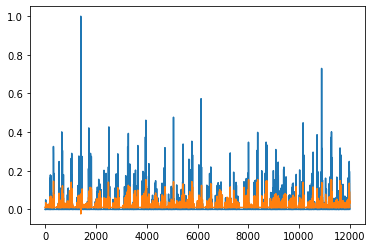

In [23]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(ypred)

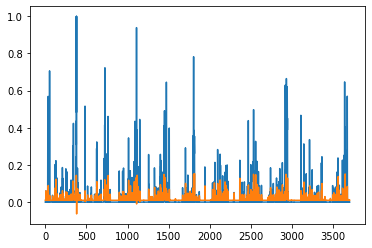

In [24]:
plt.plot(y_test)
plt.plot(ypred1)

In [0]:
from sklearn.metrics import mean_absolute_error

In [26]:
mean_absolute_error(y,ypred)

0.017515633109890235

In [27]:
mean_absolute_error(y_test,ypred1)

0.026904144638239834

In [28]:
 from sklearn.metrics import r2_score
 r2_score(y,ypred)

0.13963362758349707

In [29]:
r2_score(y_test,ypred1)

0.1478127147021212

In [30]:
model.fit(X1, y1, validation_data=(X_test1,y_test1),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0015 - accuracy: 0.8519 - val_loss: nan - val_accuracy: 0.8531
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0015 - accuracy: 0.8519 - val_loss: nan - val_accuracy: 0.8531
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0015 - accuracy: 0.8519 - val_loss: nan - val_accuracy: 0.8531
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0015 - accuracy: 0.8519 - val_loss: nan - val_accuracy: 0.8531
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0015 - accuracy: 0.8519 - val_loss: nan - val_accuracy: 0.8531
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0014 - accuracy: 0.8519 - val_loss: nan - val_accuracy: 0.8531
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0014 - accuracy: 0.8519 - val_loss: nan - val_accuracy: 0.8531
Epoch 8/50
375/375 [=======

In [31]:
ypred = model.predict(X1)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y1)
s1.corrwith(s, axis = 0) 

0    0.403559
dtype: float64

In [32]:
ypred1=model.predict(X_test1)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test1)
s1.corrwith(s,axis=0)

0    0.000369
dtype: float64

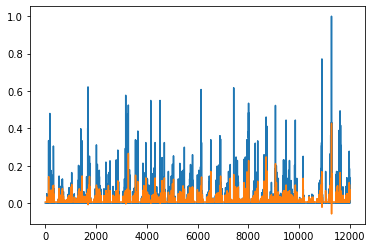

In [33]:
plt.plot(y1)
plt.plot(ypred)

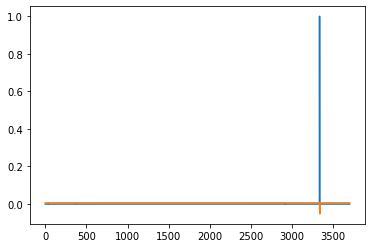

In [34]:
plt.plot(y_test1)
plt.plot(ypred1)

In [35]:
mean_absolute_error(y1,ypred)

0.01542687843938321

In [37]:
r2_score(y1,ypred)

0.15868556778584064

In [0]:
r2_score(y_test1,ypred1)

In [39]:
model.fit(X2, y2, validation_data=(X_test2,y_test2),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0048 - accuracy: 0.8414 - val_loss: nan - val_accuracy: 0.8633
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0047 - accuracy: 0.8414 - val_loss: nan - val_accuracy: 0.8633
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0047 - accuracy: 0.8414 - val_loss: nan - val_accuracy: 0.8633
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0047 - accuracy: 0.8414 - val_loss: nan - val_accuracy: 0.8633
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0047 - accuracy: 0.8414 - val_loss: nan - val_accuracy: 0.8633
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0047 - accuracy: 0.8414 - val_loss: nan - val_accuracy: 0.8633
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0047 - accuracy: 0.8414 - val_loss: nan - val_accuracy: 0.8633
Epoch 8/50
375/375 [=======

In [40]:
ypred = model.predict(X2)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y2)
s1.corrwith(s, axis = 0) 

0    0.291862
dtype: float64

In [41]:
ypred1=model.predict(X_test2)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test2)
s1.corrwith(s,axis=0)

0    0.182477
dtype: float64

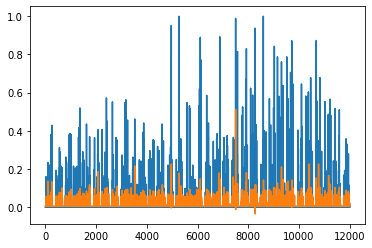

In [42]:
plt.plot(y2)
plt.plot(ypred)

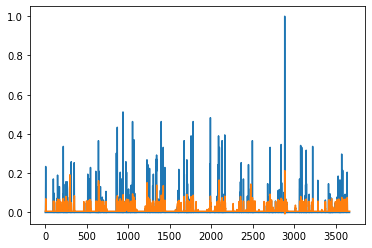

In [43]:
plt.plot(y_test2)
plt.plot(ypred1)

In [44]:
mean_absolute_error(y2,ypred)

0.02571456939760426

In [0]:
mean_absolute_error(y_test2,ypred1)

In [48]:
r2_score(y2,ypred)

0.08354848941156945

In [0]:
r2_score(y_test2,ypred1)

In [50]:
model.fit(X3, y3, validation_data=(X_test3,y_test3),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0032 - accuracy: 0.8605 - val_loss: 0.0041 - val_accuracy: 0.8708
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0032 - accuracy: 0.8605 - val_loss: 0.0040 - val_accuracy: 0.8708
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0032 - accuracy: 0.8605 - val_loss: 0.0040 - val_accuracy: 0.8708
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0032 - accuracy: 0.8605 - val_loss: 0.0040 - val_accuracy: 0.8708
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0032 - accuracy: 0.8605 - val_loss: 0.0040 - val_accuracy: 0.8708
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0032 - accuracy: 0.8605 - val_loss: 0.0040 - val_accuracy: 0.8708
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0032 - accuracy: 0.8605 - val_loss: 0.0040 - val_accuracy: 0.8708
Epoch 

In [51]:
ypred = model.predict(X3)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y3)
s1.corrwith(s, axis = 0) 

0    0.295792
dtype: float64

In [52]:
ypred1=model.predict(X_test3)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test3)
s1.corrwith(s,axis=0)

0    0.182954
dtype: float64

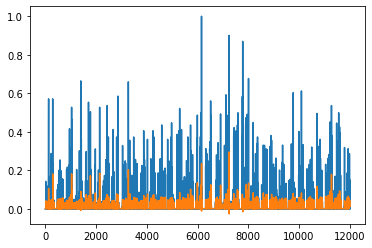

In [53]:
plt.plot(y3)
plt.plot(ypred)

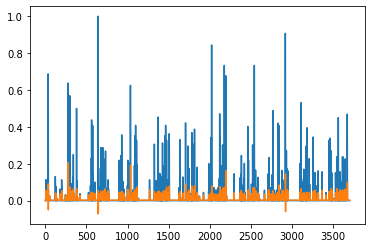

In [54]:
plt.plot(y_test3)
plt.plot(ypred1)

In [55]:
r2_score(y3,ypred)

0.0754805083648471

In [56]:
r2_score(y_test3,ypred1)

0.021839664899140576

In [57]:
mean_absolute_error(y3,ypred)

0.019467111364990103

In [58]:
mean_absolute_error(y_test3,ypred1)

0.020023417049207116

In [59]:
model.fit(X4, y4, validation_data=(X_test4,y_test4),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0028 - accuracy: 0.8360 - val_loss: nan - val_accuracy: 0.8430
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.8360 - val_loss: nan - val_accuracy: 0.8430
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.8360 - val_loss: nan - val_accuracy: 0.8430
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.8360 - val_loss: nan - val_accuracy: 0.8430
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.8360 - val_loss: nan - val_accuracy: 0.8430
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.8360 - val_loss: nan - val_accuracy: 0.8430
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.8360 - val_loss: nan - val_accuracy: 0.8430
Epoch 8/50
375/375 [=======

In [60]:
ypred = model.predict(X4)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y4)
s1.corrwith(s, axis = 0) 

0    0.351261
dtype: float64

In [61]:
ypred1=model.predict(X_test4)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test4)
s1.corrwith(s,axis=0)

0    0.093213
dtype: float64

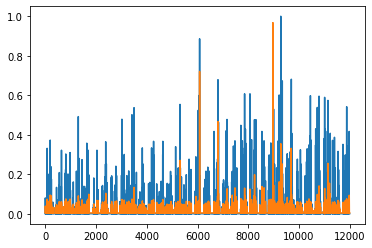

In [62]:
plt.plot(y4)
plt.plot(ypred)

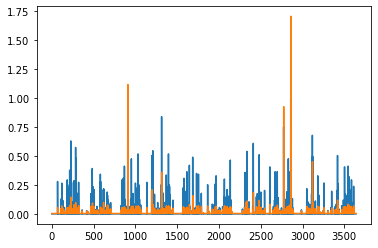

In [63]:
plt.plot(y_test4)
plt.plot(ypred1)

In [64]:
mean_absolute_error(y4,ypred)

0.018991656809648635

In [65]:
mean_absolute_error(y_test4,ypred1)

ValueError: ignored

In [67]:
r2_score(y4,ypred)

0.120577495787617

In [0]:
r2_score(y_test4,ypred1)

In [69]:
model.fit(X5, y5, validation_data=(X_test5,y_test5),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0019 - accuracy: 0.8467 - val_loss: nan - val_accuracy: 0.8612
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0018 - accuracy: 0.8467 - val_loss: nan - val_accuracy: 0.8612
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0018 - accuracy: 0.8467 - val_loss: nan - val_accuracy: 0.8612
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0018 - accuracy: 0.8467 - val_loss: nan - val_accuracy: 0.8612
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0018 - accuracy: 0.8467 - val_loss: nan - val_accuracy: 0.8612
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0018 - accuracy: 0.8467 - val_loss: nan - val_accuracy: 0.8612
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0017 - accuracy: 0.8467 - val_loss: nan - val_accuracy: 0.8612
Epoch 8/50
375/375 [=======

In [70]:
ypred = model.predict(X5)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y5)
s1.corrwith(s, axis = 0) 

0    0.282898
dtype: float64

In [71]:
r2_score(y5,ypred)

0.07748670126741364

In [72]:
ypred1=model.predict(X_test5)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test5)
s1.corrwith(s,axis=0)

0    0.147434
dtype: float64

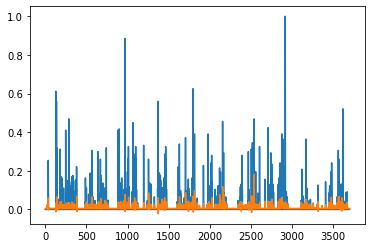

In [73]:
plt.plot(y_test5)
plt.plot(ypred1)

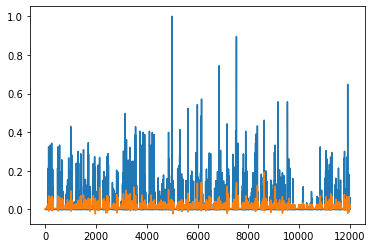

In [74]:
plt.plot(y5)
plt.plot(ypred)

In [75]:
mean_absolute_error(y5,ypred)

0.01580146944363448

In [0]:
mean_absolute_error(y_test5,ypred1)

In [0]:
r2_score(y_test5,ypred1)

In [78]:
model.fit(X6, y6, validation_data=(X_test6,y_test6),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0031 - accuracy: 0.8141 - val_loss: nan - val_accuracy: 0.8347
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0031 - accuracy: 0.8141 - val_loss: nan - val_accuracy: 0.8347
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0031 - accuracy: 0.8141 - val_loss: nan - val_accuracy: 0.8347
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0031 - accuracy: 0.8141 - val_loss: nan - val_accuracy: 0.8347
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0030 - accuracy: 0.8141 - val_loss: nan - val_accuracy: 0.8347
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0030 - accuracy: 0.8141 - val_loss: nan - val_accuracy: 0.8347
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0030 - accuracy: 0.8141 - val_loss: nan - val_accuracy: 0.8347
Epoch 8/50
375/375 [=======

In [79]:
ypred = model.predict(X6)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y6)
s1.corrwith(s, axis = 0) 

0    0.364622
dtype: float64

In [80]:
r2_score(y6,ypred)

0.13023334989385826

In [81]:
ypred1=model.predict(X_test6)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test6)
s1.corrwith(s,axis=0)

0    0.2638
dtype: float64

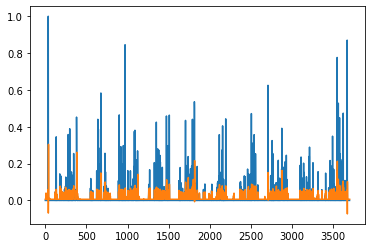

In [82]:
plt.plot(y_test6)
plt.plot(ypred1)

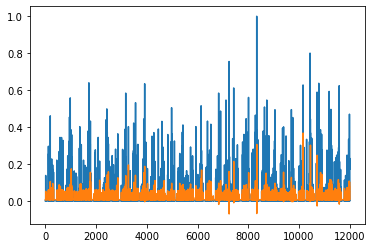

In [83]:
plt.plot(y6)
plt.plot(ypred)

In [84]:
mean_absolute_error(y6,ypred)

0.02334790184120231

In [85]:
mean_absolute_error(y_test6,ypred1)

ValueError: ignored

In [86]:
r2_score(y_test6,ypred1)

ValueError: ignored

In [87]:
model.fit(X7, y7, validation_data=(X_test7,y_test7),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0035 - accuracy: 0.8333 - val_loss: nan - val_accuracy: 0.8290
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0034 - accuracy: 0.8332 - val_loss: nan - val_accuracy: 0.8290
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0034 - accuracy: 0.8333 - val_loss: nan - val_accuracy: 0.8290
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0034 - accuracy: 0.8333 - val_loss: nan - val_accuracy: 0.8290
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0034 - accuracy: 0.8333 - val_loss: nan - val_accuracy: 0.8290
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0034 - accuracy: 0.8333 - val_loss: nan - val_accuracy: 0.8290
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0034 - accuracy: 0.8333 - val_loss: nan - val_accuracy: 0.8290
Epoch 8/50
375/375 [=======

In [88]:
ypred = model.predict(X7)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y7)
s1.corrwith(s, axis = 0) 

0    0.401219
dtype: float64

In [89]:
r2_score(y7,ypred)

0.15880156284035984

In [90]:
ypred1=model.predict(X_test7)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test7)
s1.corrwith(s,axis=0)

0    0.151054
dtype: float64

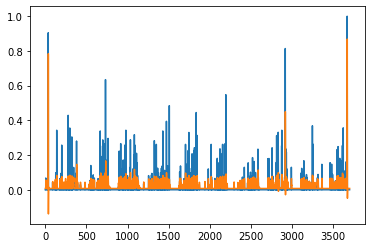

In [91]:
plt.plot(y_test7)
plt.plot(ypred1)

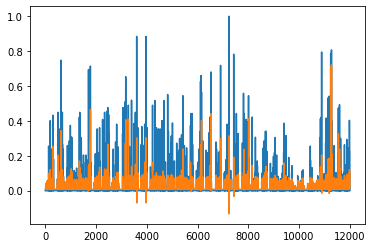

In [92]:
plt.plot(y7)
plt.plot(ypred)

In [93]:
r2_score(y_test7,ypred1)

ValueError: ignored

In [94]:
mean_absolute_error(y7,ypred)

0.02415522962266095

In [95]:
mean_absolute_error(y_test7,ypred1)

ValueError: ignored

In [96]:
model.fit(X8, y8, validation_data=(X_test8,y_test8),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0037 - accuracy: 0.8384 - val_loss: 0.0038 - val_accuracy: 0.8447
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0036 - accuracy: 0.8384 - val_loss: 0.0038 - val_accuracy: 0.8447
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0036 - accuracy: 0.8384 - val_loss: 0.0038 - val_accuracy: 0.8447
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0036 - accuracy: 0.8384 - val_loss: 0.0039 - val_accuracy: 0.8447
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0036 - accuracy: 0.8384 - val_loss: 0.0038 - val_accuracy: 0.8447
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0035 - accuracy: 0.8384 - val_loss: 0.0039 - val_accuracy: 0.8447
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0036 - accuracy: 0.8384 - val_loss: 0.0038 - val_accuracy: 0.8447
Epoch 

In [97]:
ypred = model.predict(X8)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y8)
s1.corrwith(s, axis = 0) 

0    0.393661
dtype: float64

In [98]:
r2_score(y8,ypred)

0.15420717651924576

In [99]:
ypred1=model.predict(X_test8)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test8)
s1.corrwith(s,axis=0)

0    0.235736
dtype: float64

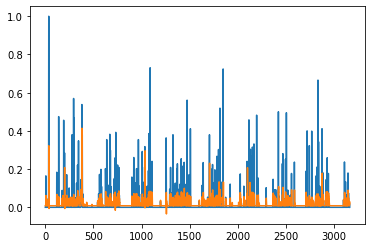

In [100]:
plt.plot(y_test8)
plt.plot(ypred1)

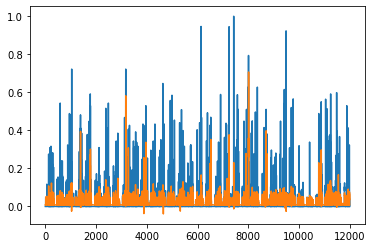

In [101]:
plt.plot(y8)
plt.plot(ypred)

In [102]:
mean_absolute_error(y8,ypred)

0.024994468676146065

In [103]:
mean_absolute_error(y_test8,ypred1)

0.026494936475478206

In [104]:
r2_score(y_test8,ypred1)

0.04423567229942593

In [105]:
model.fit(X9, y9, validation_data=(X_test9,y_test9),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 3.6781e-04 - accuracy: 0.8766 - val_loss: nan - val_accuracy: 0.8436
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 3.5820e-04 - accuracy: 0.8766 - val_loss: nan - val_accuracy: 0.8436
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 3.5881e-04 - accuracy: 0.8766 - val_loss: nan - val_accuracy: 0.8436
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 3.5765e-04 - accuracy: 0.8766 - val_loss: nan - val_accuracy: 0.8436
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 3.5760e-04 - accuracy: 0.8766 - val_loss: nan - val_accuracy: 0.8436
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 3.5672e-04 - accuracy: 0.8766 - val_loss: nan - val_accuracy: 0.8436
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 3.5742e-04 - accuracy: 0.8766 - val_loss: nan - val_accuracy: 0.8436

In [106]:
ypred = model.predict(X9)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y9)
s1.corrwith(s, axis = 0) 

0    0.338385
dtype: float64

In [107]:
r2_score(y9,ypred)

0.11449711126585826

In [108]:
ypred1=model.predict(X_test9)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test9)
s1.corrwith(s,axis=0)

0   -0.003286
dtype: float64

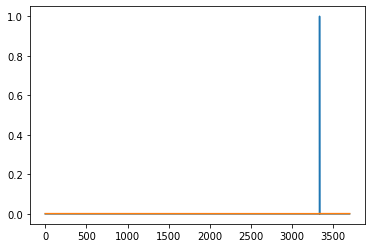

In [109]:
plt.plot(y_test9)
plt.plot(ypred1)

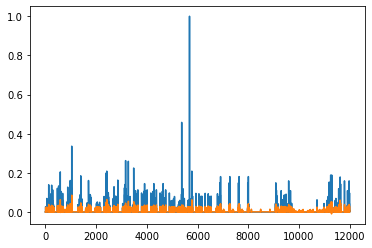

In [110]:
plt.plot(y9)
plt.plot(ypred)

In [111]:
r2_score(y_test9,ypred1)

ValueError: ignored

In [112]:
mean_absolute_error(y8,ypred)

0.018159877494755883

In [113]:
mean_absolute_error(y_test9,ypred1)

ValueError: ignored

In [114]:
model.fit(X10, y10, validation_data=(X_test10,y_test10),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0028 - accuracy: 0.8375 - val_loss: nan - val_accuracy: 0.8498
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.8375 - val_loss: nan - val_accuracy: 0.8498
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.8375 - val_loss: nan - val_accuracy: 0.8498
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.8375 - val_loss: nan - val_accuracy: 0.8498
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.8375 - val_loss: nan - val_accuracy: 0.8498
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.8375 - val_loss: nan - val_accuracy: 0.8498
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.8375 - val_loss: nan - val_accuracy: 0.8498
Epoch 8/50
375/375 [=======

In [115]:
ypred = model.predict(X10)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y10)
s1.corrwith(s, axis = 0) 

0    0.410868
dtype: float64

In [116]:
r2_score(y10,ypred)

0.16769067486926637

In [117]:
ypred1=model.predict(X_test10)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test10)
s1.corrwith(s,axis=0)

0   -0.000323
dtype: float64

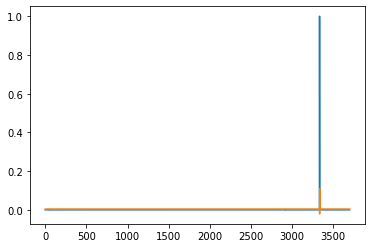

In [118]:
plt.plot(y_test10)
plt.plot(ypred1)

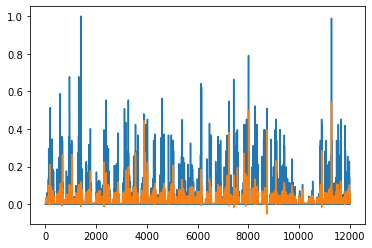

In [119]:
plt.plot(y10)
plt.plot(ypred)

In [120]:
r2_score(y_test10,ypred1)

ValueError: ignored

In [0]:
mean_absolute_error(y_test10,ypred1)

In [121]:
mean_absolute_error(y10,ypred)

0.01904999908249373

In [122]:
model.fit(X11, y11, validation_data=(X_test11,y_test11),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0029 - accuracy: 0.8449 - val_loss: 3.9079e-04 - val_accuracy: 0.8606
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0028 - accuracy: 0.8450 - val_loss: 3.2692e-04 - val_accuracy: 0.8606
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.8450 - val_loss: 3.2372e-04 - val_accuracy: 0.8606
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.8450 - val_loss: 3.3783e-04 - val_accuracy: 0.8606
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.8450 - val_loss: 3.2566e-04 - val_accuracy: 0.8606
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.8450 - val_loss: 3.5754e-04 - val_accuracy: 0.8606
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.8450 - val_loss: 3.2499e-04 -

In [123]:
ypred = model.predict(X11)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y11)
s1.corrwith(s, axis = 0) 

0    0.39107
dtype: float64

In [124]:
r2_score(y11,ypred)

0.15275163783392753

In [125]:
ypred1=model.predict(X_test11)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test11)
s1.corrwith(s,axis=0)

0   -0.000444
dtype: float64

In [126]:
r2_score(y_test11,ypred1)

-0.16547346217355718

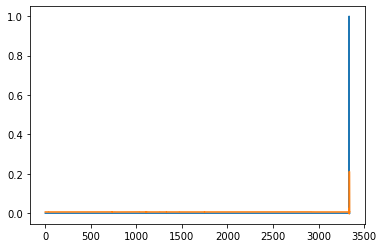

In [127]:
plt.plot(y_test11)
plt.plot(ypred1)

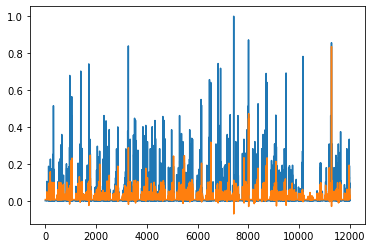

In [128]:
plt.plot(y11)
plt.plot(ypred)

In [129]:
mean_absolute_error(y_test11,ypred1)

0.006651505239785348

In [130]:
mean_absolute_error(y11,ypred)

0.020256667103573534

In [131]:
model.fit(X12, y12, validation_data=(X_test12,y_test12),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0018 - accuracy: 0.8385 - val_loss: nan - val_accuracy: 0.8377
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0017 - accuracy: 0.8385 - val_loss: nan - val_accuracy: 0.8377
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0017 - accuracy: 0.8385 - val_loss: nan - val_accuracy: 0.8377
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0017 - accuracy: 0.8385 - val_loss: nan - val_accuracy: 0.8377
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0017 - accuracy: 0.8385 - val_loss: nan - val_accuracy: 0.8377
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0017 - accuracy: 0.8385 - val_loss: nan - val_accuracy: 0.8377
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0017 - accuracy: 0.8385 - val_loss: nan - val_accuracy: 0.8377
Epoch 8/50
375/375 [=======

In [132]:
ypred = model.predict(X12)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y12)
s1.corrwith(s, axis = 0) 

0    0.448734
dtype: float64

In [133]:
r2_score(y12,ypred)

0.1978127687097433

In [134]:
ypred1=model.predict(X_test12)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test12)
s1.corrwith(s,axis=0)

0   -0.000106
dtype: float64

In [135]:
r2_score(y_test12,ypred1)

ValueError: ignored

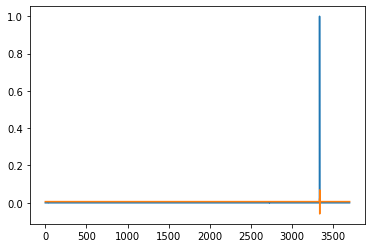

In [136]:
plt.plot(y_test12)
plt.plot(ypred1)

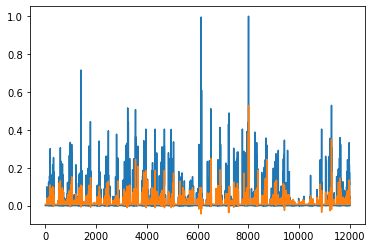

In [137]:
plt.plot(y12)
plt.plot(ypred)

In [138]:
mean_absolute_error(y_test12,ypred1)

ValueError: ignored

In [139]:
mean_absolute_error(y12,ypred)

0.017043525319752516

In [140]:
model.fit(X13, y13, validation_data=(X_test13,y_test13),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.8430 - val_loss: nan - val_accuracy: 0.8595
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.8430 - val_loss: nan - val_accuracy: 0.8595
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.8430 - val_loss: nan - val_accuracy: 0.8595
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.8430 - val_loss: nan - val_accuracy: 0.8595
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8430 - val_loss: nan - val_accuracy: 0.8595
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8430 - val_loss: nan - val_accuracy: 0.8595
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8430 - val_loss: nan - val_accuracy: 0.8595
Epoch 8/50
375/375 [=======

In [141]:
ypred = model.predict(X13)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y13)
s1.corrwith(s, axis = 0) 

0    0.408609
dtype: float64

In [142]:
r2_score(y13,ypred)

0.16241655658754517

In [143]:
ypred1=model.predict(X_test13)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test13)
s1.corrwith(s,axis=0)

0   -0.000397
dtype: float64

In [144]:
r2_score(y_test13,ypred1)

ValueError: ignored

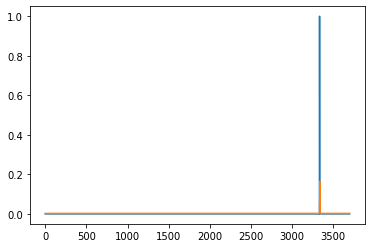

In [145]:
plt.plot(y_test13)
plt.plot(ypred1)

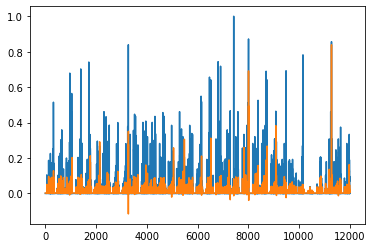

In [146]:
plt.plot(y13)
plt.plot(ypred)

In [147]:
mean_absolute_error(y_test13,ypred1)

ValueError: ignored

In [148]:
mean_absolute_error(y13,ypred)

0.017087701960617818

In [149]:
model.fit(X14, y14, validation_data=(X_test14,y_test14),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.8338 - val_loss: 0.0041 - val_accuracy: 0.8465
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.8338 - val_loss: 0.0040 - val_accuracy: 0.8465
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8338 - val_loss: 0.0040 - val_accuracy: 0.8465
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8338 - val_loss: 0.0040 - val_accuracy: 0.8465
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8338 - val_loss: 0.0040 - val_accuracy: 0.8465
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8338 - val_loss: 0.0040 - val_accuracy: 0.8465
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8338 - val_loss: 0.0040 - val_accuracy: 0.8465
Epoch 

In [150]:
ypred = model.predict(X14)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y14)
s1.corrwith(s, axis = 0) 

0    0.369307
dtype: float64

In [151]:
from sklearn.metrics import r2_score
r2_score(y14,ypred)

0.13450852018230197

In [152]:
ypred1=model.predict(X_test14)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test14)
s1.corrwith(s,axis=0)

0    0.185572
dtype: float64

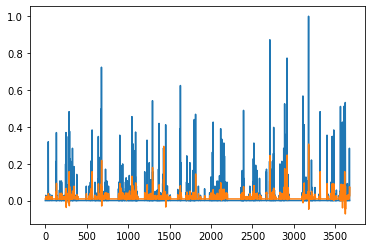

In [153]:
plt.plot(y_test14)
plt.plot(ypred1)

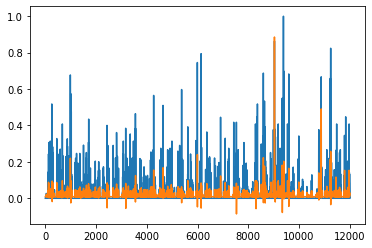

In [154]:
plt.plot(y14)
plt.plot(ypred)

In [155]:
r2_score(y_test14,ypred1)

0.027200243826112414

In [156]:
mean_absolute_error(y_test14,ypred1)

0.02568451573251499

In [157]:
mean_absolute_error(y14,ypred)

0.021228227074829825

In [158]:
model.fit(X15, y15, validation_data=(X_test15,y_test15),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0031 - accuracy: 0.8192 - val_loss: nan - val_accuracy: 0.8336
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0031 - accuracy: 0.8192 - val_loss: nan - val_accuracy: 0.8336
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0030 - accuracy: 0.8192 - val_loss: nan - val_accuracy: 0.8336
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0030 - accuracy: 0.8192 - val_loss: nan - val_accuracy: 0.8336
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0030 - accuracy: 0.8192 - val_loss: nan - val_accuracy: 0.8336
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0030 - accuracy: 0.8192 - val_loss: nan - val_accuracy: 0.8336
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0030 - accuracy: 0.8192 - val_loss: nan - val_accuracy: 0.8336
Epoch 8/50
375/375 [=======

In [159]:
ypred = model.predict(X15)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y15)
s1.corrwith(s, axis = 0) 

0    0.341129
dtype: float64

In [160]:
from sklearn.metrics import r2_score
r2_score(y15,ypred)

0.11502286296379705

In [161]:
ypred1=model.predict(X_test15)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test15)
s1.corrwith(s,axis=0)

0    0.187539
dtype: float64

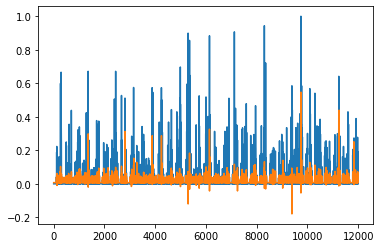

In [162]:
plt.plot(y15)
plt.plot(ypred)

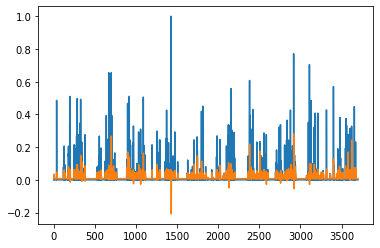

In [163]:
plt.plot(y_test15)
plt.plot(ypred1)

In [164]:
from sklearn.metrics import r2_score
r2_score(y_test15,ypred1)

ValueError: ignored

In [165]:
mean_absolute_error(y_test15,ypred1)

ValueError: ignored

In [166]:
mean_absolute_error(y15,ypred)

0.02161313309502228

In [167]:
model.fit(X16, y16, validation_data=(X_test16,y_test16),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.8464 - val_loss: nan - val_accuracy: 0.8757
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8464 - val_loss: nan - val_accuracy: 0.8757
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8464 - val_loss: nan - val_accuracy: 0.8757
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8464 - val_loss: nan - val_accuracy: 0.8757
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8464 - val_loss: nan - val_accuracy: 0.8757
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8464 - val_loss: nan - val_accuracy: 0.8757
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8464 - val_loss: nan - val_accuracy: 0.8757
Epoch 8/50
375/375 [=======

In [168]:
ypred = model.predict(X16)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y16)
s1.corrwith(s, axis = 0) 

0    0.317559
dtype: float64

In [169]:
from sklearn.metrics import r2_score
r2_score(y16,ypred)

0.10017036737707874

In [170]:
ypred1=model.predict(X_test16)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test16)
s1.corrwith(s,axis=0)

0    0.200208
dtype: float64

In [171]:
r2_score(y_test16,ypred1)

ValueError: ignored

In [172]:
mean_absolute_error(y_test16,ypred1)

ValueError: ignored

In [173]:
mean_absolute_error(y16,ypred)

0.01868638716235244

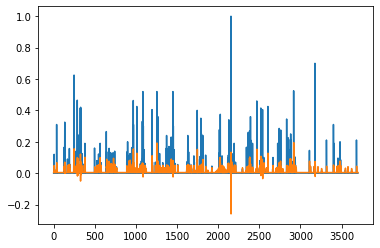

In [174]:
plt.plot(y_test16)
plt.plot(ypred1)

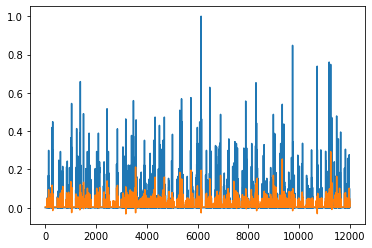

In [175]:
plt.plot(y16)
plt.plot(ypred)

In [176]:
model.fit(X17, y17, validation_data=(X_test17,y_test17),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.8949 - val_loss: nan - val_accuracy: 0.8944
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0025 - accuracy: 0.8949 - val_loss: nan - val_accuracy: 0.8944
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8949 - val_loss: nan - val_accuracy: 0.8941
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8949 - val_loss: nan - val_accuracy: 0.8944
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8949 - val_loss: nan - val_accuracy: 0.8941
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8949 - val_loss: nan - val_accuracy: 0.8941
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.8949 - val_loss: nan - val_accuracy: 0.8944
Epoch 8/50
375/375 [=======

In [177]:
ypred = model.predict(X17)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y17)
s1.corrwith(s, axis = 0) 

0    0.372516
dtype: float64

In [178]:
from sklearn.metrics import r2_score
r2_score(y17,ypred)

0.13281089636451648

In [179]:
ypred1=model.predict(X_test17)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test17)
s1.corrwith(s,axis=0)

0    0.037865
dtype: float64

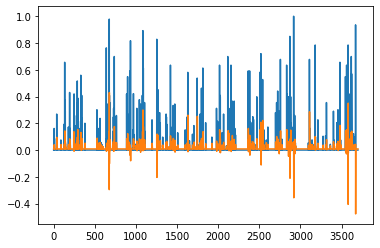

In [180]:
plt.plot(y_test17)
plt.plot(ypred1)

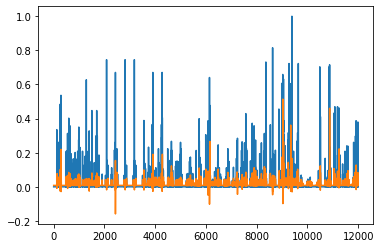

In [181]:
plt.plot(y17)
plt.plot(ypred)

In [182]:
r2_score(y_test17,ypred1)

ValueError: ignored

In [0]:
mean_absolute_error(y_test17,ypred1)

In [183]:
mean_absolute_error(y17,ypred)

0.018797330473241555

In [184]:
model.fit(X18, y18, validation_data=(X_test18,y_test18),epochs=50)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 1.7044e-04 - accuracy: 0.8540 - val_loss: 0.0023 - val_accuracy: 0.8646
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 1.6156e-04 - accuracy: 0.8540 - val_loss: 0.0024 - val_accuracy: 0.8646
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 1.6505e-04 - accuracy: 0.8540 - val_loss: 0.0024 - val_accuracy: 0.8646
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 1.6437e-04 - accuracy: 0.8540 - val_loss: 0.0024 - val_accuracy: 0.8646
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 1.5886e-04 - accuracy: 0.8540 - val_loss: 0.0023 - val_accuracy: 0.8646
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 1.5645e-04 - accuracy: 0.8540 - val_loss: 0.0024 - val_accuracy: 0.8646
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 1.5656e-04 - accuracy: 0.8540 - val_loss: 0.0024 -

In [185]:
ypred = model.predict(X18)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y18)
s1.corrwith(s, axis = 0) 

0    0.193696
dtype: float64

In [186]:
from sklearn.metrics import r2_score
r2_score(y18,ypred)

0.033774114002421696

In [187]:
ypred1 = model.predict(X_test18)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test18)
s1.corrwith(s, axis = 0) 

0    0.143191
dtype: float64

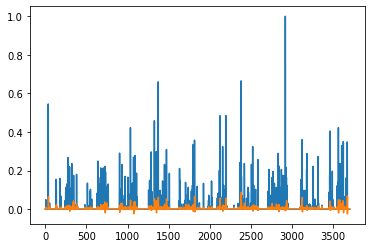

In [188]:
plt.plot(y_test18)
plt.plot(ypred1)

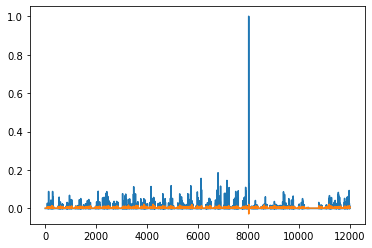

In [189]:
plt.plot(y18)
plt.plot(ypred)

In [190]:
r2_score(y_test18,ypred1)

-0.0071796242808026545

In [191]:
mean_absolute_error(y_test18,ypred1)

0.01372758088617339

In [192]:
mean_absolute_error(y18,ypred)

0.004019582810397937